In [21]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **Load data into DataFrame**

In [0]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [0]:
def get_data():
    train_data_path ='/content/gdrive/My Drive/final_project_deep_nn/train.csv'
    train = pd.read_csv(train_data_path)
    
    #get test data
    test_data_path ='/content/gdrive/My Drive/final_project_deep_nn/test.csv'
    test = pd.read_csv(test_data_path)
    
    return train , test

def get_combined_data():
  #reading train data
  train , test = get_data()

  target = train.SalePrice
  train.drop(['SalePrice'],axis = 1 , inplace = True)

  combined = train.append(test)
  combined.reset_index(inplace=True)
  combined.drop(['index', 'Id'], inplace=True, axis=1)
  return combined, target

#Load train and test data into pandas DataFrames
train_data, test_data = get_data()

#Combine train and test data to process them together
combined, target = get_combined_data()

# **Exploratory Data Analysis**

In [0]:
def get_cols_with_no_nans(df, col_type):
    '''
    Arguments :
    df : The dataframe to process
    col_type : 
          num : to only get numerical columns with no nans
          no_num : to only get nun-numerical columns with no nans
          all : to get any columns with no nans    
    '''
    if (col_type == 'num'):
        predictors = df.select_dtypes(exclude=['object'])
    elif (col_type == 'no_num'):
        predictors = df.select_dtypes(include=['object'])
    elif (col_type == 'all'):
        predictors = df
    else :
        print('Error : choose a type (num, no_num, all)')
        return 0
    cols_with_no_nans = []
    for col in predictors.columns:
        if not df[col].isnull().any():
            cols_with_no_nans.append(col)
    return cols_with_no_nans

In [0]:
num_cols = get_cols_with_no_nans(combined , 'num')
cat_cols = get_cols_with_no_nans(combined , 'no_num')

In [26]:
print ('Number of numerical columns with no nan values :',len(num_cols))
print ('Number of nun-numerical columns with no nan values :',len(cat_cols))

Number of numerical columns with no nan values : 25
Number of nun-numerical columns with no nan values : 20


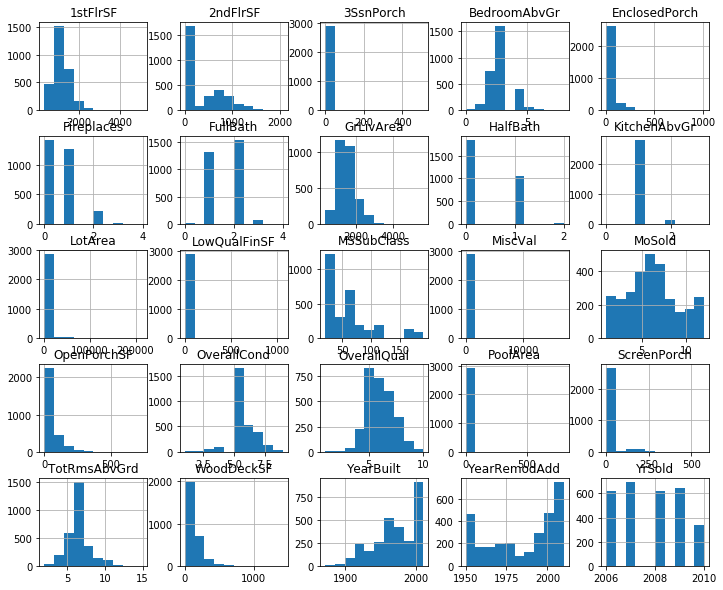

In [27]:
combined = combined[num_cols + cat_cols]
combined.hist(figsize = (12,10))
plt.show()

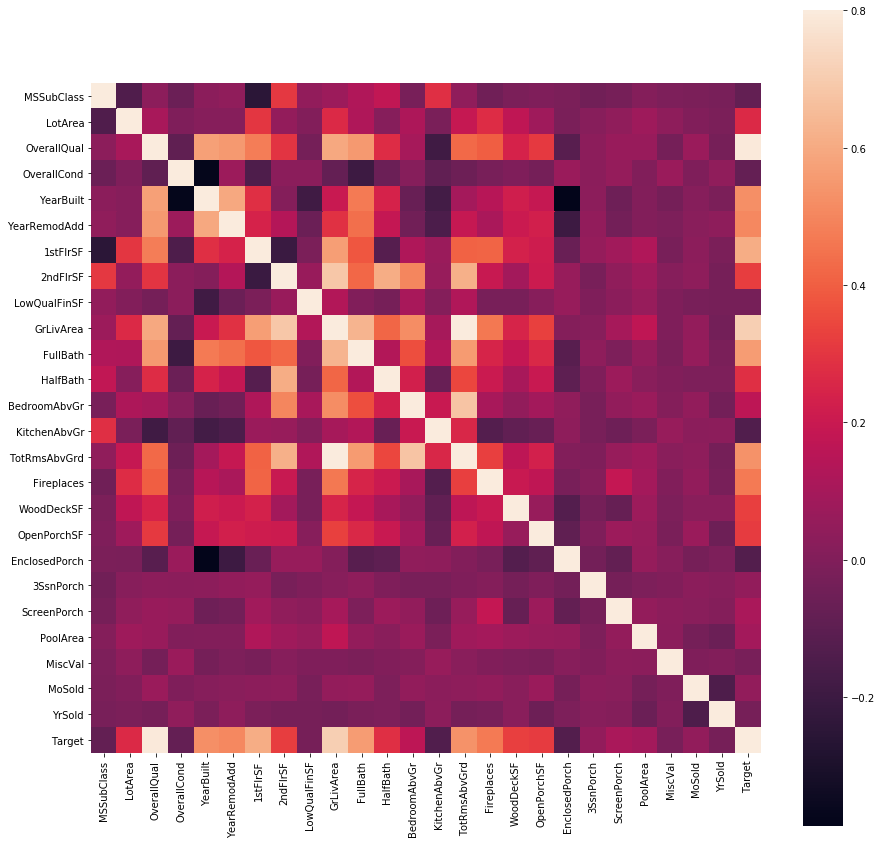

In [28]:
train_data = train_data[num_cols + cat_cols]
train_data['Target'] = target

C_mat = train_data.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()


# **Onehot encode the categorical features**

In [29]:
def encode_categorical_features(df,colNames):
    for col in colNames:
        if( df[col].dtype == np.dtype('object')):
            dummies = pd.get_dummies(df[col],prefix=col)
            df = pd.concat([df,dummies],axis=1)

            #drop the encoded column
            df.drop([col],axis = 1 , inplace=True)
    return df
    

print('There were {} columns before encoding categorical features'.format(combined.shape[1]))
combined = encode_categorical_features(combined, cat_cols)
print('There are {} columns after encoding categorical features'.format(combined.shape[1]))

There were 45 columns before encoding categorical features
There are 149 columns after encoding categorical features


In [0]:
def split_combined():
    global combined
    train = combined[:1460]
    test = combined[1460:]

    return train , test 
  
train, test = split_combined()

# **Normalize the features**

In [0]:
mean = train.mean(axis=0)
train -= mean
std = train.std(axis=0)
train /= std
test -= mean
test /= std

# **Build the model**

In [41]:
from keras.optimizers import Nadam
def build_model():
    NN_model = Sequential()
    # The Input Layer :
    NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train.shape[1], activation='relu'))

    # The Hidden Layers :
    NN_model.add(Dropout(0.25))
    NN_model.add(Dense(256, kernel_initializer='normal'))
    NN_model.add(BatchNormalization())
    NN_model.add(Activation('relu'))
    NN_model.add(Dropout(0.25))

    NN_model.add(Dense(256, kernel_initializer='normal'))
    NN_model.add(BatchNormalization())
    NN_model.add(Activation('relu'))
    NN_model.add(Dropout(0.25))

    NN_model.add(Dense(256, kernel_initializer='normal'))
    NN_model.add(BatchNormalization())
    NN_model.add(Activation('relu'))
    NN_model.add(Dropout(0.25))

    NN_model.add(Dense(256, kernel_initializer='normal'))
    NN_model.add(BatchNormalization())
    NN_model.add(Activation('relu'))
    NN_model.add(Dropout(0.25))

    NN_model.add(Dense(128, kernel_initializer='normal'))
    NN_model.add(BatchNormalization())
    NN_model.add(Activation('relu'))
    NN_model.add(Dropout(0.25))

    NN_model.add(Dense(128, kernel_initializer='normal'))
    NN_model.add(BatchNormalization())
    NN_model.add(Activation('relu'))
    NN_model.add(Dropout(0.25))

    NN_model.add(Dense(128, kernel_initializer='normal'))
    NN_model.add(BatchNormalization())
    NN_model.add(Activation('relu'))
    NN_model.add(Dropout(0.25))

    # The Output Layer :
    NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

    # Compile the network :
    NN_model.compile(loss='mean_absolute_error', optimizer='nadam', metrics=['mean_absolute_error'])
    return NN_model

NN_model = build_model()
print(NN_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_196 (Dense)            (None, 128)               19200     
_________________________________________________________________
dropout_179 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_197 (Dense)            (None, 256)               33024     
_________________________________________________________________
batch_normalization_162 (Bat (None, 256)               1024      
_________________________________________________________________
activation_162 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_180 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_198 (Dense)            (None, 256)               65792     
__________

# **Perform 5-fold Cross Validation**

processing fold # 0


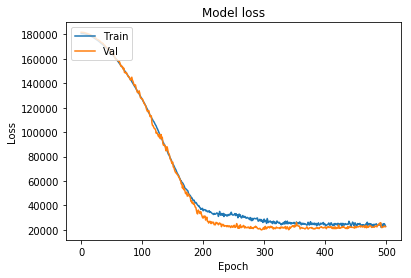

processing fold # 1


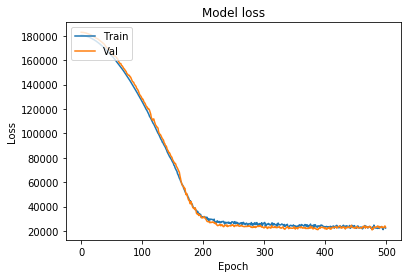

processing fold # 2


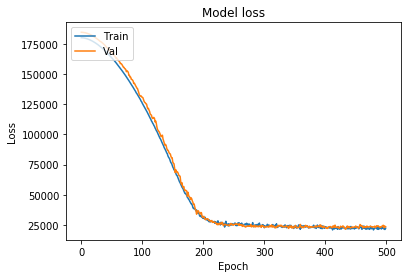

processing fold # 3


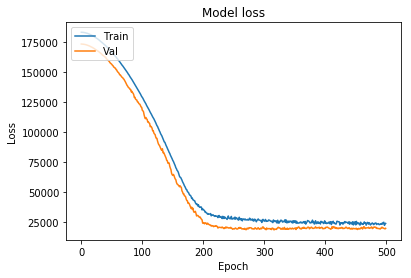

processing fold # 4


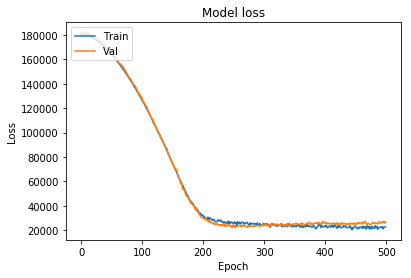

61028.102401380565


In [35]:
k = 5
num_val_samples = len(train) // k
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = target[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
    [train[:i * num_val_samples],
    train[(i + 1) * num_val_samples:]],
    axis=0)
    
    partial_train_targets = np.concatenate(
    [target[:i * num_val_samples],
    target[(i + 1) * num_val_samples:]],
    axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
    validation_data=(val_data, val_targets),
    epochs=num_epochs, batch_size=16, verbose=0)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)
    
print(np.mean(all_mae_histories))

In [0]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

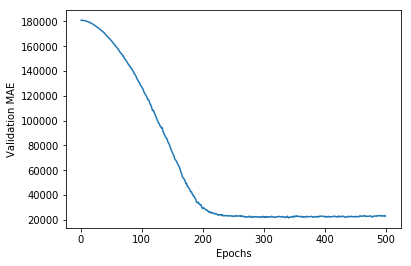

In [37]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

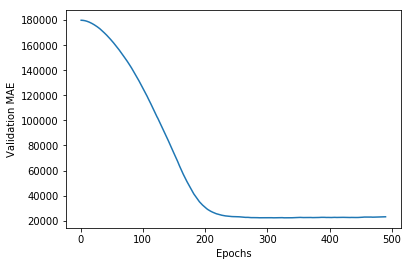

In [38]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

# **Compile the model again and predict 'SalePrice' for the test set**

In [0]:
model = build_model()
history = model.fit(train, target, epochs=250, batch_size=16, verbose=1)

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

In [0]:
predictions = model.predict(test)


In [0]:
sub = pd.DataFrame()
sub['Id'] = pd.read_csv('test.csv').Id
sub['SalePrice'] = predictions
sub.to_csv('submission.csv', index=False)